In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [3]:
# Enter parameters for query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
# Create lists for weather data
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
timestamp = []

# Set counters for reporting out during run and assigning "sleep" time for api calls
count = 0
set_num = 1

# Get weather data
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    if count == 50:
        set_num = set_num+1
        count = 0
        sleep(5)
    else:
        count = count + 1
    print(f"Processing Record {cities.index(city) + 1} of Set {set_num} | {city}")
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_data = weather_response.json()
        
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        timestamp.append(weather_data['dt'])
    except:
        print(f"City not found. Skipping...")
        latitude.append(None)
        longitude.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country.append(None)
        timestamp.append(None)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | deputatskiy
Processing Record 4 of Set 1 | potiskum
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | egvekinot
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | watsa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | odweyne
Processing Record 13 of Set 1 | lima
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | mamallapuram
Processing Record 16 of Set 1 | latung
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | nur
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | buluang
Processing Record 22 of Set 1 | saint george
Processing Record 23 of Set 1 | rikitea
Pr

Processing Record 184 of Set 4 | pangody
Processing Record 185 of Set 4 | price
Processing Record 186 of Set 4 | caramay
Processing Record 187 of Set 4 | rawson
Processing Record 188 of Set 4 | ibia
Processing Record 189 of Set 4 | mecca
Processing Record 190 of Set 4 | upernavik
Processing Record 191 of Set 4 | ous
Processing Record 192 of Set 4 | jalu
Processing Record 193 of Set 4 | sao filipe
Processing Record 194 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 195 of Set 4 | cape town
Processing Record 196 of Set 4 | myskhako
Processing Record 197 of Set 4 | victoria
Processing Record 198 of Set 4 | tondano
Processing Record 199 of Set 4 | umm lajj
Processing Record 200 of Set 4 | the valley
Processing Record 201 of Set 4 | ivanivka
Processing Record 202 of Set 4 | parkes
Processing Record 203 of Set 4 | ponta do sol
Processing Record 204 of Set 5 | arraial do cabo
Processing Record 205 of Set 5 | estevan
Processing Record 206 of Set 5 | hermanus
Processing Re

Processing Record 372 of Set 8 | wichian buri
Processing Record 373 of Set 8 | codrington
Processing Record 374 of Set 8 | erenhot
Processing Record 375 of Set 8 | hovd
Processing Record 376 of Set 8 | inhambane
Processing Record 377 of Set 8 | cerro largo
Processing Record 378 of Set 8 | susner
Processing Record 379 of Set 8 | muros
Processing Record 380 of Set 8 | atbasar
Processing Record 381 of Set 8 | abashiri
Processing Record 382 of Set 8 | xuddur
Processing Record 383 of Set 8 | juli
Processing Record 384 of Set 8 | naryan-mar
Processing Record 385 of Set 8 | galich
Processing Record 386 of Set 8 | lorengau
Processing Record 387 of Set 8 | lompoc
Processing Record 388 of Set 8 | ust-nera
Processing Record 389 of Set 8 | bathsheba
Processing Record 390 of Set 8 | nanortalik
Processing Record 391 of Set 8 | yulara
Processing Record 392 of Set 8 | zhanaozen
Processing Record 393 of Set 8 | port blair
Processing Record 394 of Set 8 | murchison
Processing Record 395 of Set 8 | palma

Processing Record 558 of Set 11 | labuhan
Processing Record 559 of Set 11 | palana
Processing Record 560 of Set 11 | fortuna
Processing Record 561 of Set 12 | sayyan
Processing Record 562 of Set 12 | jardim
Processing Record 563 of Set 12 | chapada dos guimaraes
Processing Record 564 of Set 12 | pierre
Processing Record 565 of Set 12 | gondanglegi
Processing Record 566 of Set 12 | walvis bay
Processing Record 567 of Set 12 | edd
Processing Record 568 of Set 12 | faya
Processing Record 569 of Set 12 | takoradi
Processing Record 570 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 571 of Set 12 | komsomolskiy
Processing Record 572 of Set 12 | manado
Processing Record 573 of Set 12 | yeppoon
Processing Record 574 of Set 12 | barcelos
Processing Record 575 of Set 12 | wagar
Processing Record 576 of Set 12 | tianpeng
Processing Record 577 of Set 12 | talnakh
Processing Record 578 of Set 12 | lapeer
Processing Record 579 of Set 12 | sussex
Processing Record 580 of Set 

In [5]:
# Create list for Northern vs Southern Hemisphere
hemisphere = []
for current_latitude in latitude:
    if current_latitude == None:
        hemisphere.append(None)
    elif current_latitude >= 0:
        hemisphere.append("Northern Hemisphere")
    else:
        hemisphere.append("Southern Hemisphere")

In [7]:
# Create dictionary and dataframe
city_weather = {
    "City" : cities,
    "Latitude" : latitude,
    "Longitude" : longitude,
    "Temperature (F)" : max_temp,
    "Humidity (%)" : humidity,
    "Cloudiness (%)" : cloudiness,
    "Wind Speed (mph)" : wind_speed,
    "Hemisphere" : hemisphere,
    "Country" : country,
    "Date" : timestamp
}

city_weather_df = pd.DataFrame(city_weather)
city_weather_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Hemisphere,Country,Date
0,bredasdorp,-34.5322,20.0403,60.80,88.0,14.0,4.61,Southern Hemisphere,ZA,1.613530e+09
1,busselton,-33.6500,115.3333,75.99,65.0,0.0,3.00,Southern Hemisphere,AU,1.613530e+09
2,deputatskiy,69.3000,139.9000,-19.28,87.0,93.0,0.76,Northern Hemisphere,RU,1.613530e+09
3,potiskum,11.7091,11.0694,62.92,26.0,0.0,9.98,Northern Hemisphere,NG,1.613530e+09
4,port alfred,-33.5906,26.8910,62.87,79.0,3.0,14.25,Southern Hemisphere,ZA,1.613530e+09


In [8]:
# Clean df by dropping None values
clean_city_weather_df = city_weather_df.dropna()
clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Hemisphere,Country,Date
0,bredasdorp,-34.5322,20.0403,60.80,88.0,14.0,4.61,Southern Hemisphere,ZA,1.613530e+09
1,busselton,-33.6500,115.3333,75.99,65.0,0.0,3.00,Southern Hemisphere,AU,1.613530e+09
2,deputatskiy,69.3000,139.9000,-19.28,87.0,93.0,0.76,Northern Hemisphere,RU,1.613530e+09
3,potiskum,11.7091,11.0694,62.92,26.0,0.0,9.98,Northern Hemisphere,NG,1.613530e+09
4,port alfred,-33.5906,26.8910,62.87,79.0,3.0,14.25,Southern Hemisphere,ZA,1.613530e+09


In [9]:
# Check if there is humidity above 100%
clean_city_weather_df['Humidity (%)'].max()

100.0

In [10]:
# Convert Raw Data to DataFrame
clean_city_weather_df.to_csv(output_data_file, index=False)

# Latitude vs. Max Temperature Plot

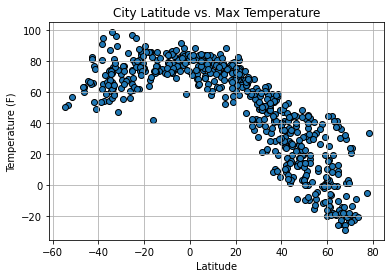

In [14]:
# Create Latitude vs. Max Temperature Plot
plt.scatter(clean_city_weather_df['Latitude'], clean_city_weather_df['Temperature (F)'], edgecolors= "black")
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

# Latitude vs. Humidity Plot

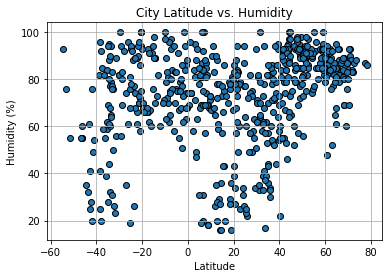

In [13]:
# Create Latitude vs. Humidity Plot
plt.scatter(clean_city_weather_df['Latitude'], clean_city_weather_df['Humidity (%)'], edgecolors= "black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

# Latitude vs. Cloudiness Plot

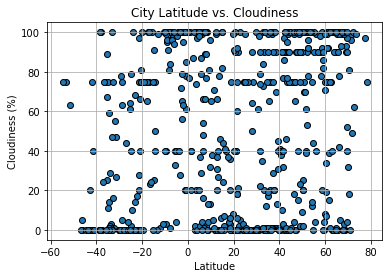

In [15]:
# Create Latitude vs. Cloudiness Plot
plt.scatter(clean_city_weather_df['Latitude'], clean_city_weather_df['Cloudiness (%)'], edgecolors= "black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

# Latitude vs. Wind Speed Plot

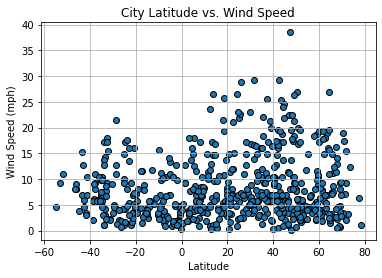

In [16]:
# Create Latitude vs. Wind Speed Plot
plt.scatter(clean_city_weather_df['Latitude'], clean_city_weather_df['Wind Speed (mph)'], edgecolors= "black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

In [28]:
# Create a dataframe for each Hemisphere
nh_df = clean_city_weather_df.loc[clean_city_weather_df['Hemisphere'] == 'Northern Hemisphere']
sh_df = clean_city_weather_df.loc[clean_city_weather_df['Hemisphere'] == 'Southern Hemisphere']

# Max Temp v. Latitude Linear Regression by Hemisphere

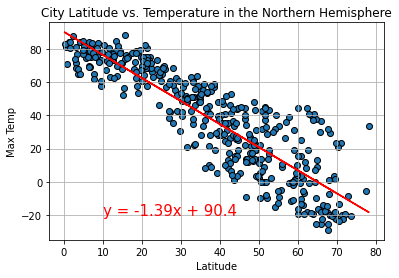

In [40]:
# Northern Hemisphere - Max Temp v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = nh_df['Latitude']
y_values = nh_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Temperature in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.show()

In [35]:
print(f"The r value is: {rvalue}")

The r value is: -0.8843523362613419


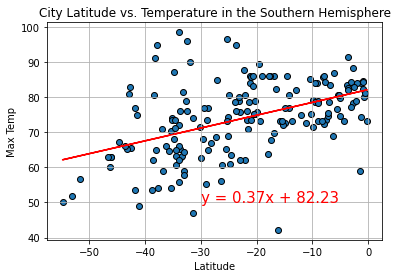

In [39]:
# Southern Hemisphere - Max Temp v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = sh_df['Latitude']
y_values = sh_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Temperature in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.show()

In [37]:
print(f"The r value is: {rvalue}")

The r value is: 0.46658303288789293


### Analysis

- Temperature in the Northern Hemisphere has a strong negative relationship with Latitude
- Temperature in the Southern Hemisphere has a weak (almost moderate) positive relationship with Latitude

# Humidity v. Latitude Linear Regression by Hemisphere

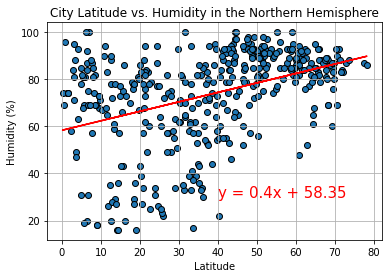

In [41]:
# Northern Hemisphere - Humidity v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = nh_df['Latitude']
y_values = nh_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Humidity in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

In [44]:
print(f"The r value is: {rvalue}")

The r value is: 0.3469385598043169


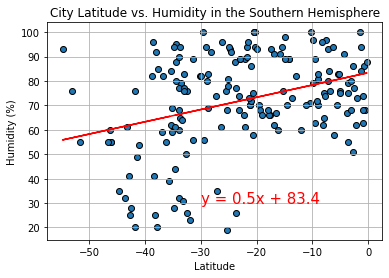

In [43]:
# Southern Hemisphere - Humidity v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = sh_df['Latitude']
y_values = sh_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Humidity in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

In [45]:
print(f"The r value is: {rvalue}")

The r value is: 0.3469385598043169


### Analysis

- Both Hemispheres show a weak positive correlation between humidity and latitude

# Cloudiness v. Latitude Linear Regression by Hemisphere

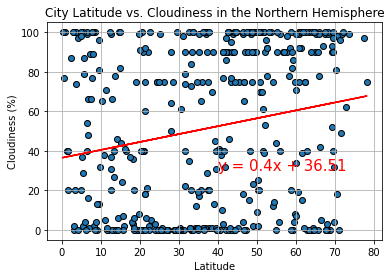

In [46]:
# Northern Hemisphere - Cloudiness v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = nh_df['Latitude']
y_values = nh_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Cloudiness in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

In [47]:
print(f"The r value is: {rvalue}")

The r value is: 0.19720833103130497


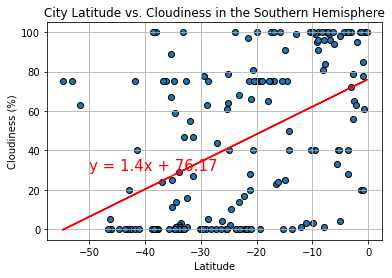

In [53]:
# Southern Hemisphere - Cloudiness v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = sh_df['Latitude']
y_values = sh_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Cloudiness in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

In [54]:
print(f"The r value is: {rvalue}")

The r value is: 0.4759835537571375


### Analysis

- Cloudiness in the Northern Hemisphere has a very weak positive relationship with Latitude
- Cloudiness in the Southern Hemisphere has a weak (almost moderate) positive relationship with Latitude

# Wind Speed (mph) v. Latitude Linear Regression by Hemisphere

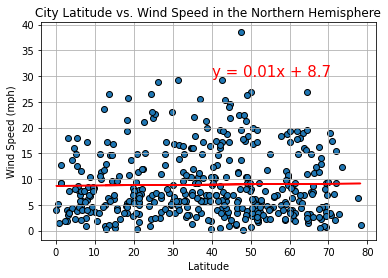

In [55]:
# Northern Hemisphere - Wind Speed (mph) v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = nh_df['Latitude']
y_values = nh_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Wind Speed in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

In [56]:
print(f"The r value is: {rvalue}")

The r value is: 0.017742067956793228


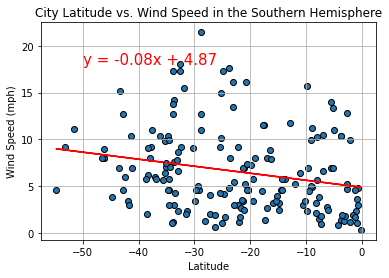

In [60]:
# Southern Hemisphere - Wind Speed (mph) v. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = sh_df['Latitude']
y_values = sh_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")

# Labels
plt.title('City Latitude vs. Wind Speed in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

In [58]:
print(f"The r value is: {rvalue}")

The r value is: -0.23087064387052356


### Analysis

- Wind Speed in the Northern Hemisphere has a very weak (near 0) positive relationship with Latitude
- Wind Speed in the Southern Hemisphere has a weak negative relationship with Latitude

# Final Analysis

- Given the random nature of grabbing the data, some correlations may be off due to a lack of sufficent data to determine if a strong, moderate, or weak correlation exists
- Temperature seems to have the only strong correlation with latitude, while humidity, cloudiness, and wind speed all show weak relationships
- From the first Temperature graph, it seems like it is also the only attribute to have a normal distribution when compared to latitude